In [5]:
# !pip install statsmodels
# !pip install seaborn
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install scipy
!pip3 install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 165.4 kB/s eta 0:00:0000:0100:03


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import plotly.express as px
from scipy.stats import norm

ModuleNotFoundError: No module named 'plotly'

In [3]:
array = np.array([8.5, 7.1, 6.7, 6.2, 2.9, 4.4, 6.0, 5.8, 5.4, 8.2, 6.9,
        6.5, 6.1, 3.8, 6.0, 6.0, 5.6, 5.3, 7.7, 6.8, 6.5, 6.1,
        4.2, 4.7, 5.6, 5.4, 5.3, 7.4, 6.7, 6.4, 6.1, 4.5, 6.0,
        5.8, 5.6, 5.1])
array.sort() # вариационный ряд

sample_size = array.size
sum_arr = np.sum(array)
sample_mean = array.mean()
arr_median = np.median(array)
arr_mode = st.mode(array)
arr_var = np.var(array)
arr_std = np.std(array)
arr_mse = np.sqrt(np.square(array)).mean()
arr_min = min(array)
arr_max = max(array)
arr_uq = np.quantile(array, 0.75)
arr_lq = np.quantile(array, 0.25)
arr_asymmetry_factors = stats.skew(array, axis=0, bias=True)
arr_kurtosis_factors = stats.kurtosis(array, axis=0, bias=True)

In [ ]:
print(f'Объем выборки = {sample_size}')
print(f'Выборочное среднее = {sample_mean}')
print(f'Медиана = {arr_median}')
print(f'Мода = {arr_mode}')
print(f'Выборочная дисперсия = {arr_var}')
print(f'Выборочное среднекв откл = {arr_std}')
print(f'Минимум = {arr_min}')
print(f'Максимум = {arr_max}')
print(f'Размах выборки = {arr_max - arr_min}')
print(f'Верхний квантиль = {arr_uq}')
print(f'Нижний квантиль = {arr_lq}')
print(f'Интерквартильный размах = {arr_uq - arr_lq}')
print(f'Коэффициент асимметрии = {arr_asymmetry_factors}')
print(f'Коэффициент эксцесса = {arr_kurtosis_factors}')

In [ ]:
# гистограмма по частоте
mu, std = norm.fit(array)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.grid(True, alpha=0.2)
plt.hist(array, bins=36, color='b', density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.gca().set(title='Гистограмма по частоте', ylabel='Частота', xlabel='Значения');

In [ ]:
ecdf = ECDF(array)
plt.ylabel('$F(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none')
plt.gca().set(title='График эмпирической функции');


In [ ]:
my_array = np.insert(array, 0, 0)
my_array = np.append(my_array, 9)
print(my_array)
px.ecdf(my_array, markers=True)


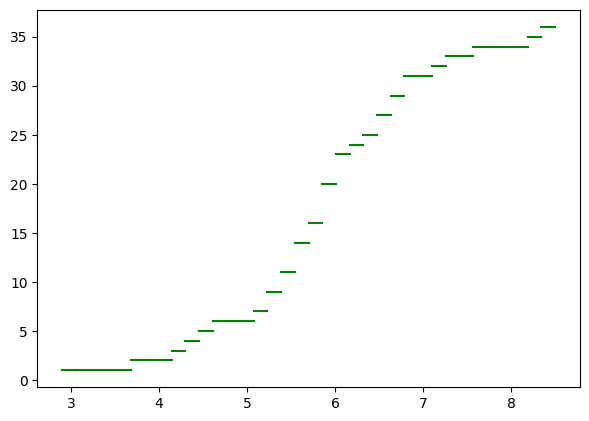

In [9]:
bin_dt, bin_gr = np.histogram(array, bins=len(array))
Y = bin_dt.cumsum()
for i in range(len(Y)):
    plt.plot([bin_gr[i], bin_gr[i+1]],[Y[i], Y[i]],color='green')